# Navigation Task

In [15]:
import torch
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from model.kohonen_som import KohonenSOM
from model.manager_som import ManagerSOM
from model.manager_som_position import ManagerSOMPosition
from custom_env.navigation_task import NavigationTask
%matplotlib inline

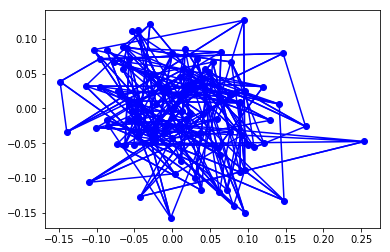

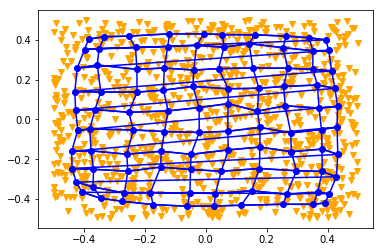

tensor([[ 0.3915, -0.4199],
        [ 0.3533, -0.4271],
        [ 0.2542, -0.4266],
        [ 0.1163, -0.4318],
        [ 0.0277, -0.4352],
        [-0.0599, -0.4365],
        [-0.1725, -0.4283],
        [-0.2751, -0.4115],
        [-0.3436, -0.3969],
        [-0.4054, -0.3663],
        [ 0.4054, -0.3737],
        [ 0.3678, -0.3665],
        [ 0.2657, -0.3761],
        [ 0.1504, -0.3589],
        [ 0.0322, -0.3728],
        [-0.0517, -0.3698],
        [-0.1810, -0.3680],
        [-0.2666, -0.3703],
        [-0.3692, -0.3395],
        [-0.4244, -0.3153],
        [ 0.4290, -0.2886],
        [ 0.3823, -0.2614],
        [ 0.2980, -0.2582],
        [ 0.1763, -0.2469],
        [ 0.0513, -0.2607],
        [-0.0496, -0.2519],
        [-0.1478, -0.2398],
        [-0.2553, -0.2606],
        [-0.3679, -0.2509],
        [-0.4383, -0.2473],
        [ 0.4336, -0.1761],
        [ 0.3818, -0.1493],
        [ 0.2809, -0.1624],
        [ 0.1780, -0.1392],
        [ 0.0744, -0.1532],
        [-0.0479, -0

In [2]:
x = torch.rand(1000, 2)-0.5
maxitr = 10**4*5
som = KohonenSOM(total_nodes=100, node_size=2, update_iterations=maxitr)
reshaped = som.w.reshape(10, 10, 2)
for v in range(10):
    plt.plot(reshaped[:, v, 0].numpy(), reshaped[:, v, 1].numpy(), marker='None', linestyle='-', color='blue')
    plt.plot(reshaped[v, :, 0].numpy(), reshaped[v, :, 1].numpy(), marker='None', linestyle='-', color='blue')
plt.plot(som.w[:, 0].numpy(), som.w[:, 1].numpy(), marker='o', color='blue')
plt.show()
for t in range(maxitr):
    a, c = som.update(x, t, 0)
    
plt.plot(x[:, 0].numpy(), x[:, 1].numpy(), marker='v', linestyle='None', color='orange')
reshaped = som.w.reshape(10, 10, 2)
for v in range(10):
    plt.plot(reshaped[:, v, 0].numpy(), reshaped[:, v, 1].numpy(), marker='None', linestyle='-', color='blue')
    plt.plot(reshaped[v, :, 0].numpy(), reshaped[v, :, 1].numpy(), marker='None', linestyle='-', color='blue')
plt.plot(som.w[:, 0].numpy(), som.w[:, 1].numpy(), marker='o', color='blue')
plt.show()
som.w

## Modified Manager Self Organizing Map

In [3]:
class ModifiedManagerSOM (ManagerSOM):
    """
    Removed clustering of neighboring neurons
    
    Set Bellman operator 
        from Q(s, a) <- r(s, a) + max_a Q(s', a) 
        to Q(s, a) <- r(s, a) + max_a Q(s, a)
    
    """
    
    def __init__(self, total_nodes = None, state_som = None, worker_som = None, update_iterations = None):
        super().__init__(
            total_nodes = total_nodes, 
            state_som = state_som, 
            worker_som = worker_som, 
            update_iterations = update_iterations)
        
    def action_q_learning(self,
                        current_state_index = None,
                        action_index = None,
                        next_state_index = None,
                        reward = 0,
                        t = None,
                        htype = 0,
                        lr = 0.9,
                        gamma = 0.9):
        current_state_space = torch.zeros(self.state_som.total_nodes)
        current_state_space[current_state_index] = 1

        winner_c = self.select_winner(current_state_space)

        # update q-value using new reward and largest est. prob of action
        self.w[winner_c][self.state_som.total_nodes + action_index] += lr * (
            reward
            + gamma * self.get_value(current_state_space)
            - self.w[winner_c][self.state_som.total_nodes + action_index]
            )

/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som.py:39: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  return torch.max(self.w[self.select_winner(x)][-self.worker_som.total_nodes:])[0]


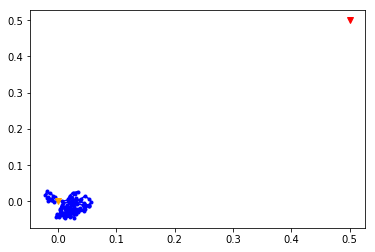

0 tensor(-4.9928)


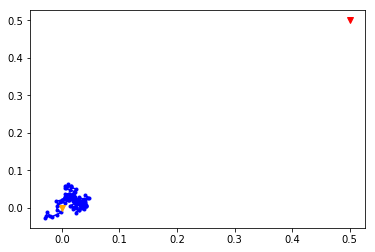

1 tensor(-4.6523)


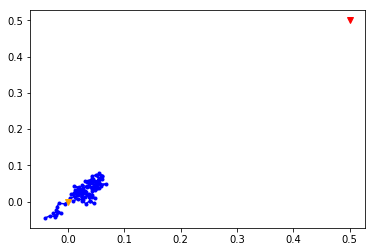

2 tensor(-4.5513)


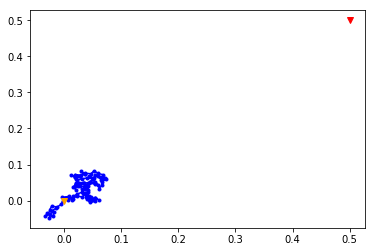

3 tensor(-4.4887)


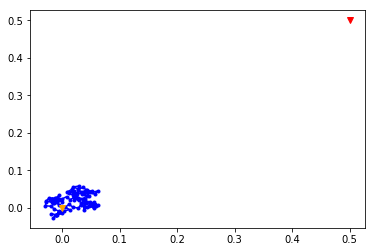

4 tensor(-4.8852)


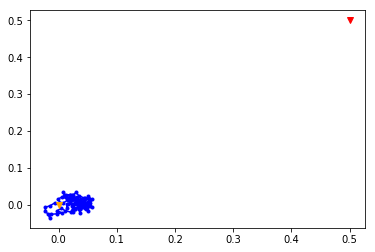

5 tensor(-4.6367)


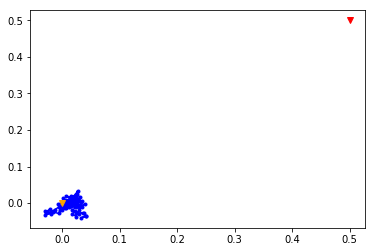

6 tensor(-4.8430)


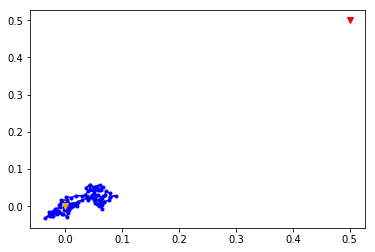

7 tensor(-4.7435)


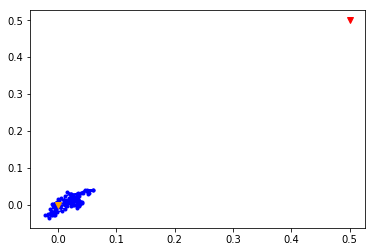

8 tensor(-4.9193)


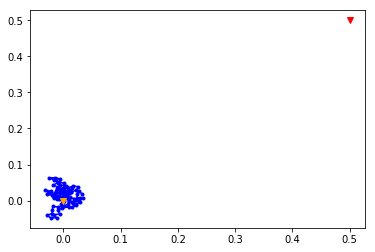

9 tensor(-4.7250)


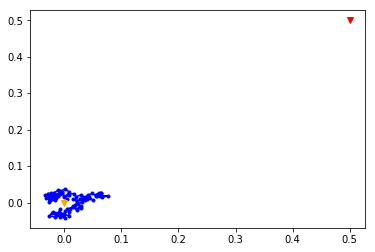

10 tensor(-4.9755)


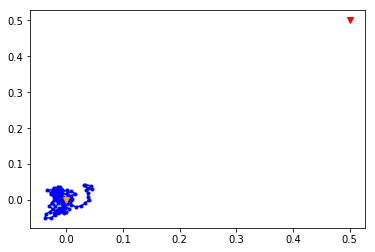

11 tensor(-4.9892)


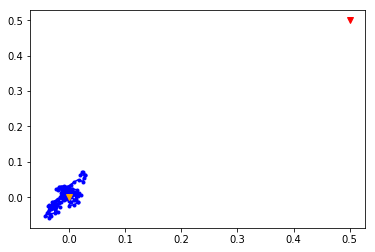

12 tensor(-4.9904)


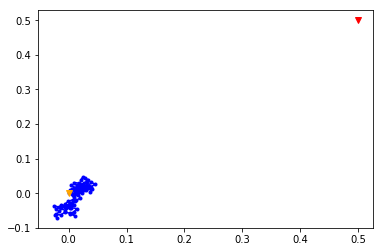

13 tensor(-4.7966)


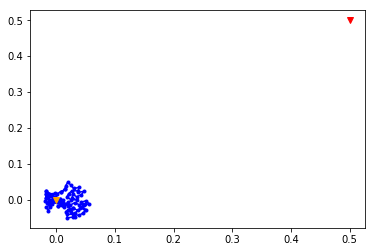

14 tensor(-5.0131)


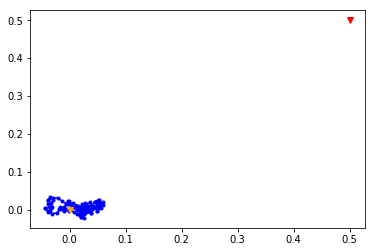

15 tensor(-5.0356)


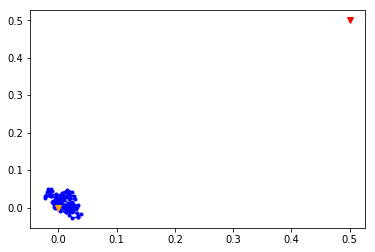

16 tensor(-4.8326)


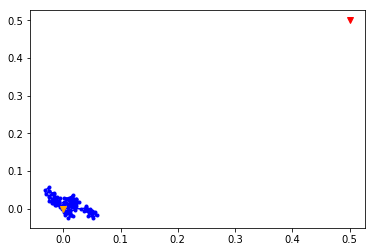

17 tensor(-4.9056)


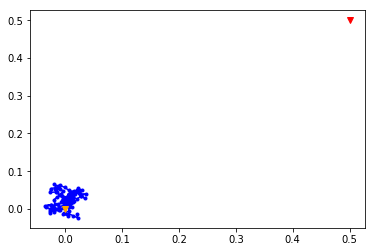

18 tensor(-5.0944)


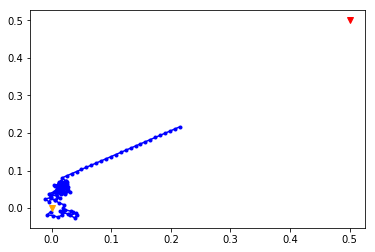

19 tensor(-4.9212)


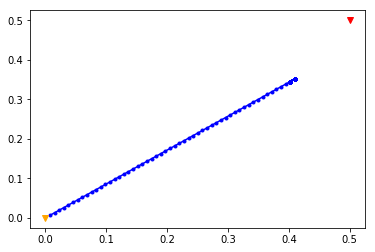

20 tensor(-3.7805)


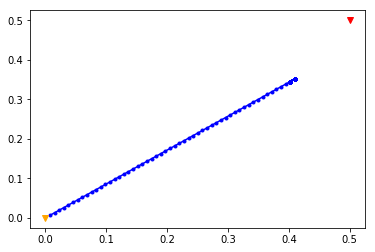

21 tensor(-3.7805)


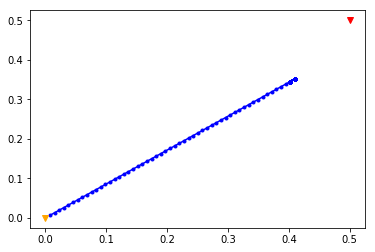

22 tensor(-3.7805)


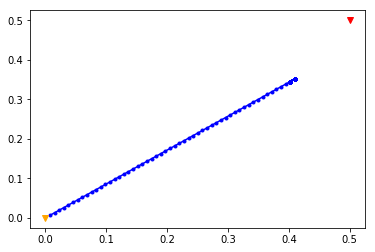

23 tensor(-3.7805)


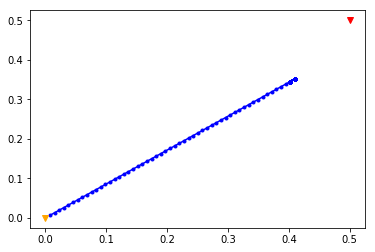

24 tensor(-3.7805)


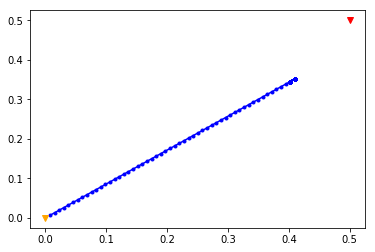

25 tensor(-3.7805)


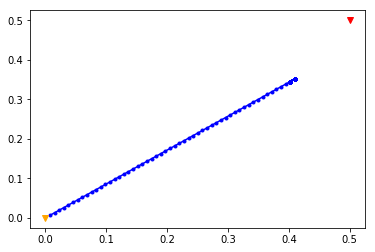

26 tensor(-3.7805)


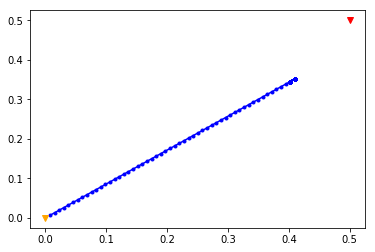

27 tensor(-3.7805)


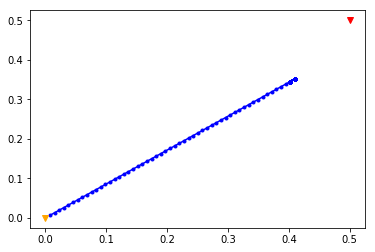

28 tensor(-3.7805)


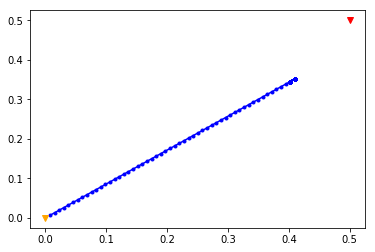

29 tensor(-3.7805)


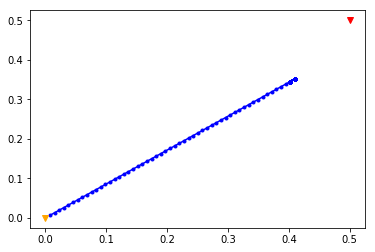

30 tensor(-3.7805)


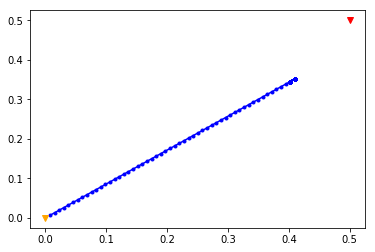

31 tensor(-3.7805)


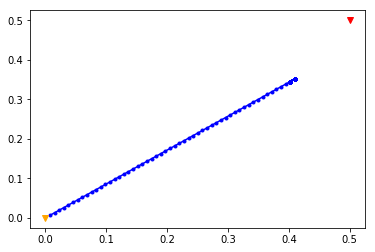

32 tensor(-3.7805)


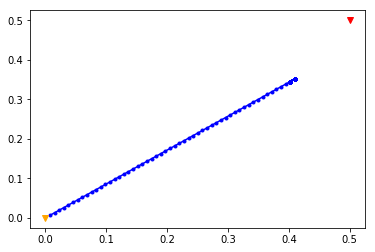

33 tensor(-3.7805)


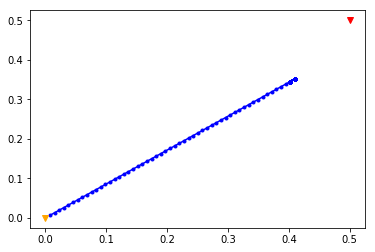

34 tensor(-3.7805)


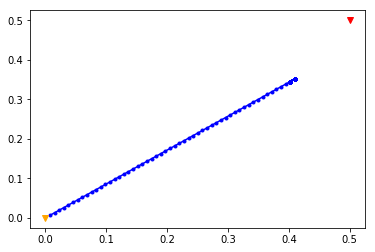

35 tensor(-3.7805)


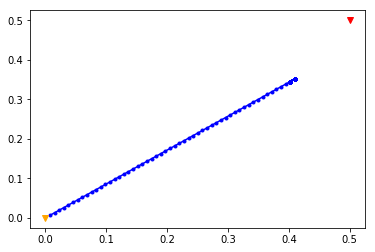

36 tensor(-3.7805)


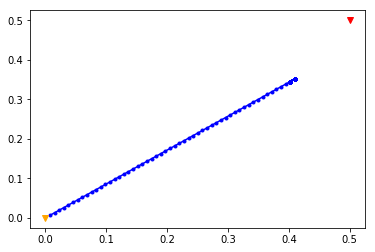

37 tensor(-3.7805)


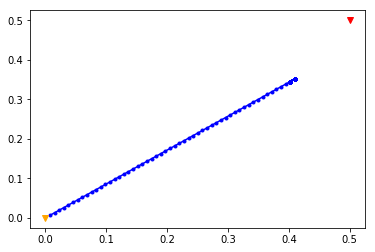

38 tensor(-3.7805)


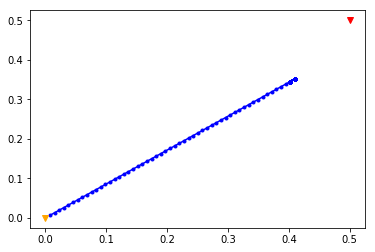

39 tensor(-3.7805)


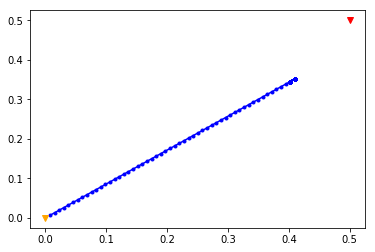

40 tensor(-3.7805)


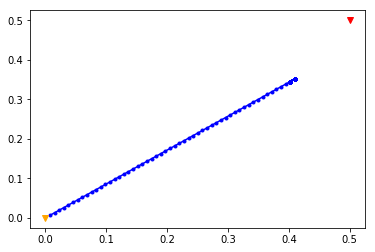

41 tensor(-3.7805)


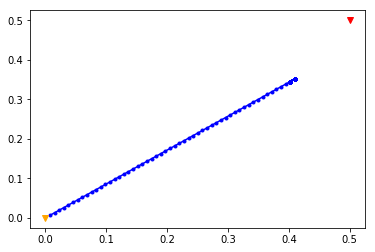

42 tensor(-3.7805)


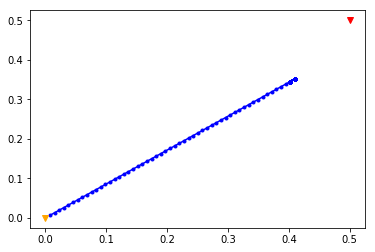

43 tensor(-3.7805)


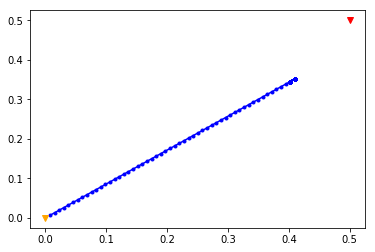

44 tensor(-3.7805)


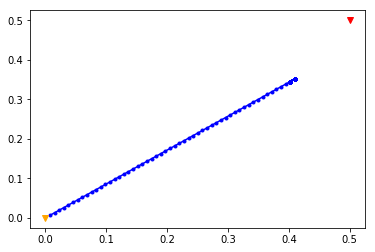

45 tensor(-3.7805)


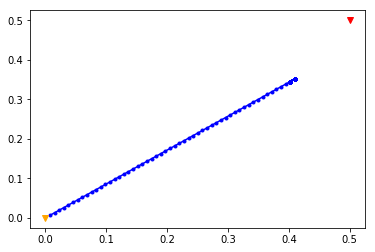

46 tensor(-3.7805)


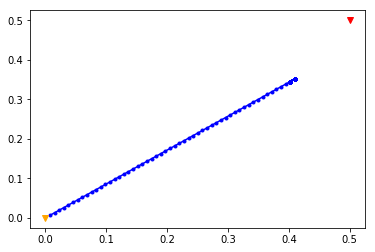

47 tensor(-3.7805)


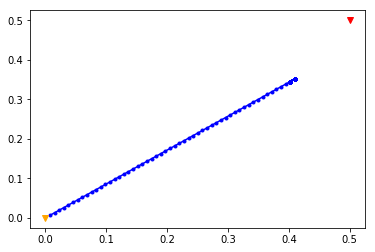

48 tensor(-3.7805)


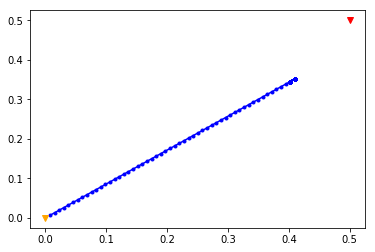

49 tensor(-3.7805)


In [20]:
manager_maxitr = 50
maxtime = 100
epsilon = 0.0
torch.manual_seed(0)
random.seed(0)

manager_som = ModifiedManagerSOM(total_nodes=100, state_som = som, worker_som=som, update_iterations=manager_maxitr)
task = NavigationTask()

for epoch in range(manager_maxitr):
    # for visualization
    total_return = 0
    state_trajectory = []
    obs = task.state()
    
    for t in range(maxtime):
        obs = task.state()
        state_vector = torch.zeros(som.total_nodes)
        state_vector[som.select_winner(obs)] = 1
        
        # epsilon greedy
        if random.random() > epsilon:
            action_index = manager_som.get_action(state_vector) # deterministic

        else:
            action_index = random.randrange(som.total_nodes)
        
        # step forward
        reward, next_obs = task.step(som.w[action_index])
        
        # online training
        manager_som.action_q_learning(
            current_state_index = som.select_winner(obs),
            action_index = action_index,
            reward = reward,
            t = epoch)
        
        obs = next_obs
        state_trajectory.append(np.array(obs))
        total_return += (0.9 ** t) * reward
        
    plt.plot(np.array(state_trajectory)[:, 0], np.array(state_trajectory)[:, 1], marker='.', linestyle='-', color='blue')
    plt.plot(0.0, 0.0, marker='v', linestyle='None', color='orange')
    plt.plot(np.array(task.goal)[0], np.array(task.goal)[1], marker='v', linestyle='None', color='red')
    plt.show()
    print(epoch, total_return)
    
    task.reset()

trajectories.append(torch.cat((
    current_position, 
    action_index.reshape(1).float(),
    reward_value.reshape(1).float(), 
    next_position)))

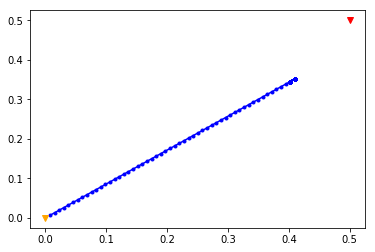

tensor(-3.7805)


In [21]:
# for visualization
total_return = 0
state_trajectory = []

for t in range(maxtime): 
    obs = task.state()
    state_vector = torch.zeros(som.total_nodes)
    state_vector[som.select_winner(obs)] = 1
    action_index = manager_som.get_action(state_vector) # deterministic

    # step forward
    reward, next_obs = task.step(som.w[action_index])

    obs = next_obs
    state_trajectory.append(np.array(obs))
    total_return += (0.9 ** t) * reward

plt.plot(np.array(state_trajectory)[:, 0], np.array(state_trajectory)[:, 1], marker='.', linestyle='-', color='blue')
plt.plot(0.0, 0.0, marker='v', linestyle='None', color='orange')
plt.plot(np.array(task.goal)[0], np.array(task.goal)[1], marker='v', linestyle='None', color='red')
plt.show()
print(total_return)

task.reset()

## Modfied Position-based Manager SOM

In [22]:
class ModifiedManagerSOMPosition (ManagerSOMPosition):
    """
    Removed clustering of neighboring neurons
    
    Set Bellman operator 
        from Q(s, a) <- r(s, a) + max_a Q(s', a) 
        to Q(s, a) <- r(s, a) + max_a Q(s, a)
    
    """
    
    def __init__(self, total_nodes = None, state_som = None, worker_som = None, update_iterations = None):
        super().__init__(
            total_nodes = total_nodes, 
            state_som = state_som, 
            worker_som = worker_som, 
            update_iterations = update_iterations)
        
    def action_q_learning(self,
                        current_state_position = None,
                        action_index = None,
                        next_state_position = None,
                        reward = 0,
                        t = None,
                        htype = 0,
                        lr = 0.9,
                        gamma = 0.9):
        winner_c = self.select_winner(current_state_position)

        # update q-value using new reward and largest est. prob of action
        self.w[winner_c][2 + action_index] += lr * (
            reward
            + gamma * self.get_softmax(current_state_position)
            - self.w[winner_c][2 + action_index]
            )

/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:44: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  ][-self.worker_som.total_nodes:]))[0]
/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:44: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  ][-self.worker_som.total_nodes:]))[0]


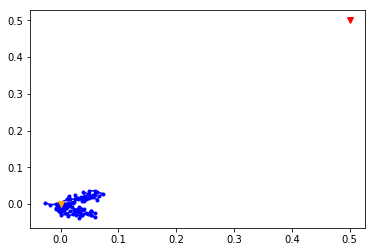

0 tensor(-4.9992)


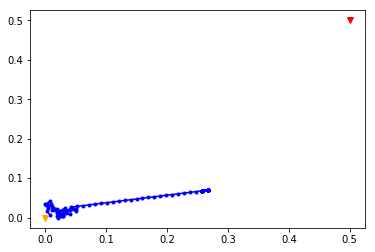

1 tensor(-4.6453)


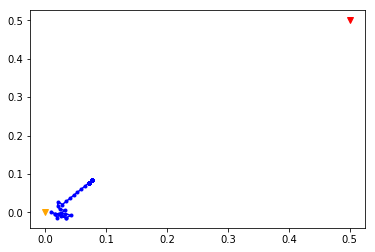

2 tensor(-4.6333)


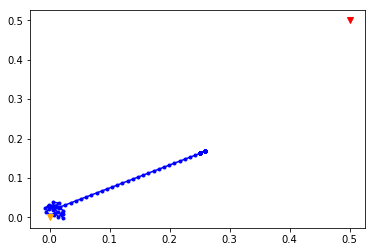

3 tensor(-4.6341)


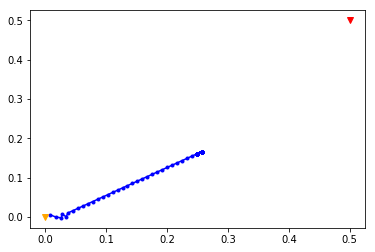

4 tensor(-4.0516)


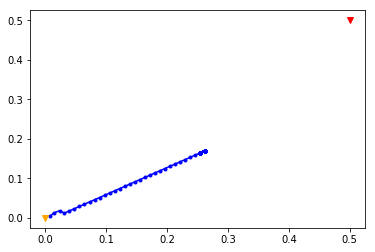

5 tensor(-3.8966)


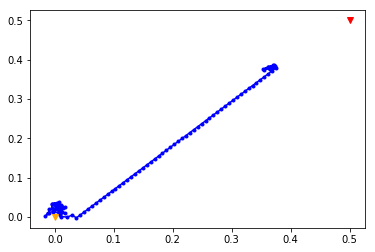

6 tensor(-4.6856)


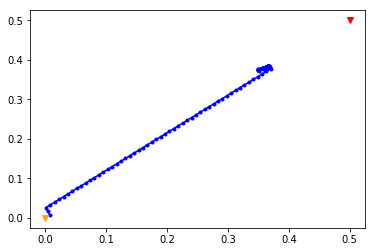

7 tensor(-3.8874)


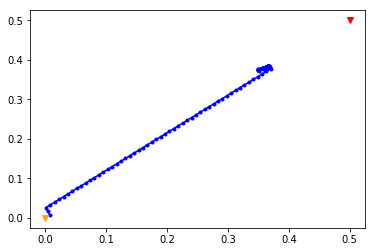

8 tensor(-3.8874)


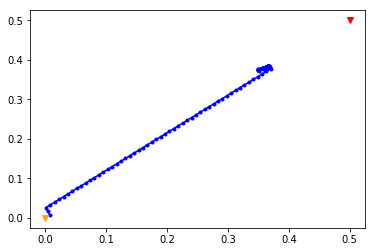

9 tensor(-3.8874)


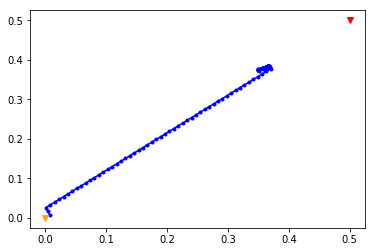

10 tensor(-3.8874)


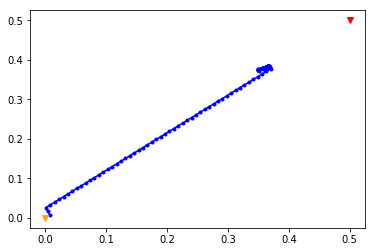

11 tensor(-3.8874)


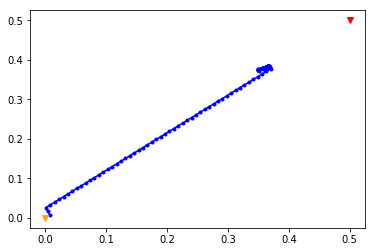

12 tensor(-3.8874)


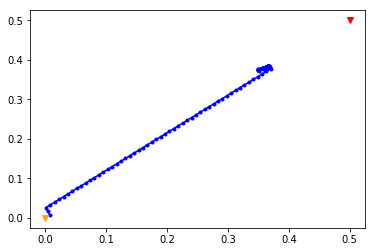

13 tensor(-3.8874)


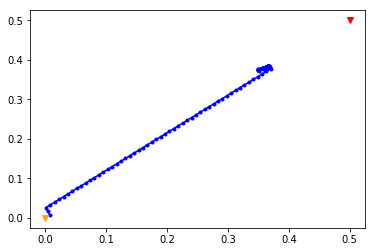

14 tensor(-3.8874)


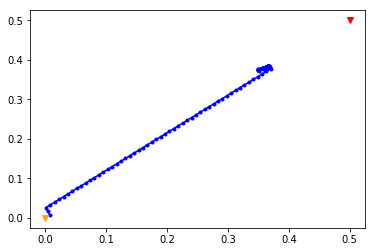

15 tensor(-3.8874)


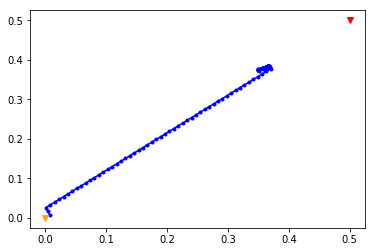

16 tensor(-3.8874)


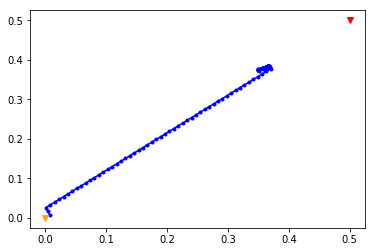

17 tensor(-3.8874)


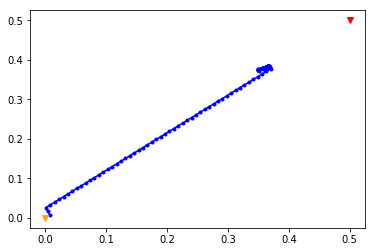

18 tensor(-3.8874)


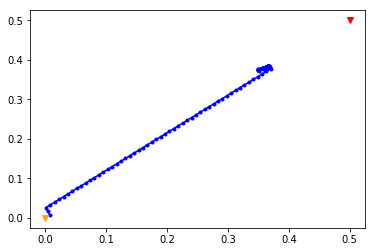

19 tensor(-3.8874)


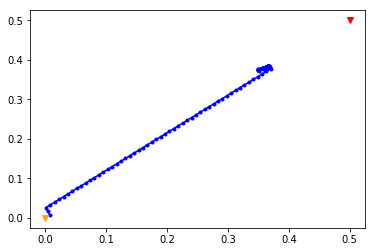

20 tensor(-3.8874)


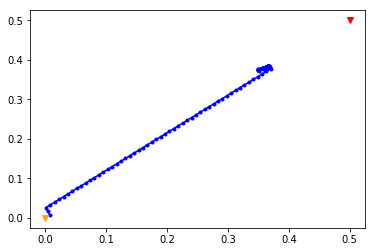

21 tensor(-3.8874)


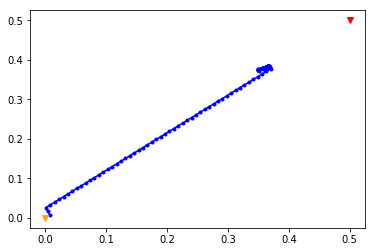

22 tensor(-3.8874)


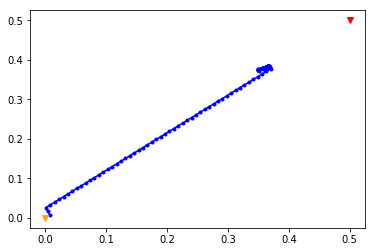

23 tensor(-3.8874)


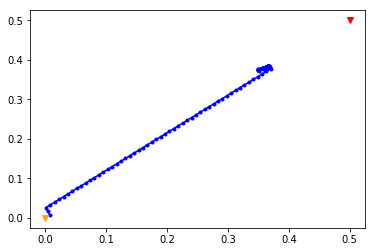

24 tensor(-3.8874)


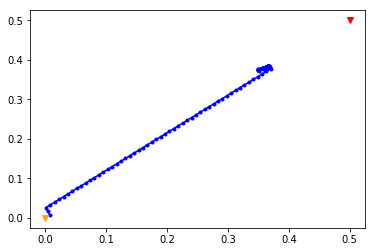

25 tensor(-3.8874)


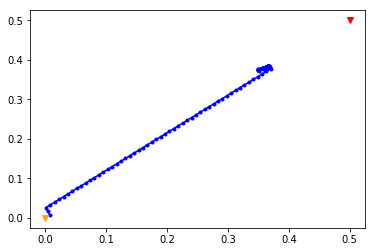

26 tensor(-3.8874)


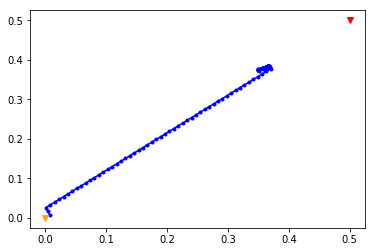

27 tensor(-3.8874)


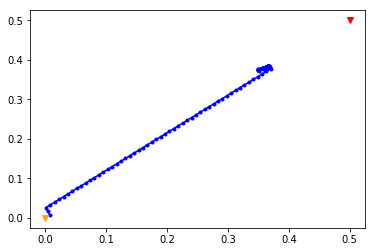

28 tensor(-3.8874)


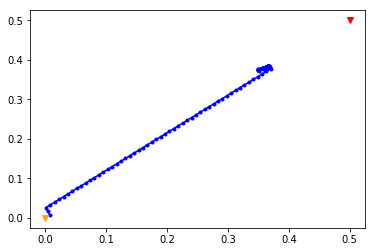

29 tensor(-3.8874)


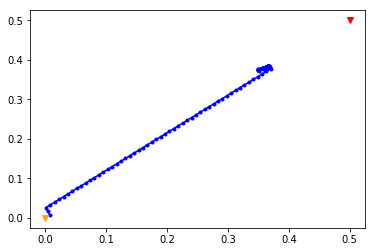

30 tensor(-3.8874)


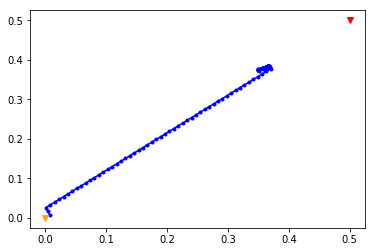

31 tensor(-3.8874)


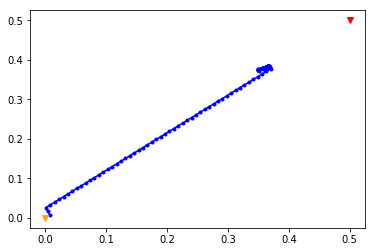

32 tensor(-3.8874)


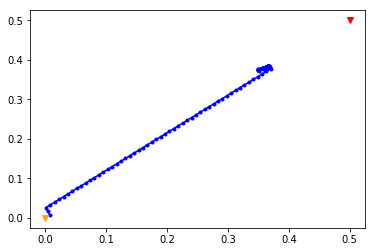

33 tensor(-3.8874)


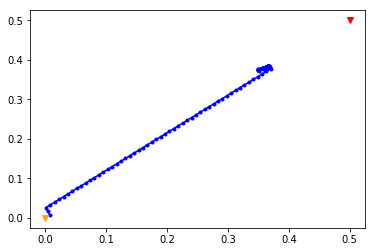

34 tensor(-3.8874)


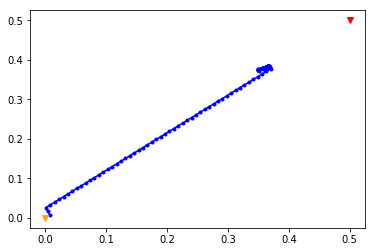

35 tensor(-3.8874)


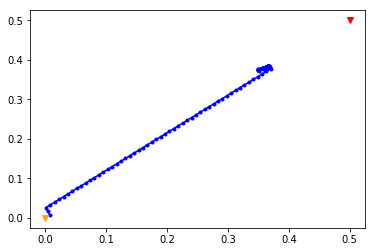

36 tensor(-3.8874)


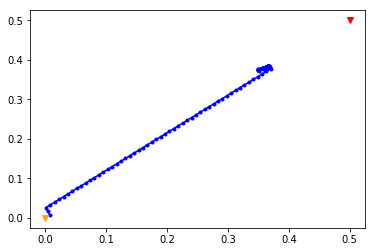

37 tensor(-3.8874)


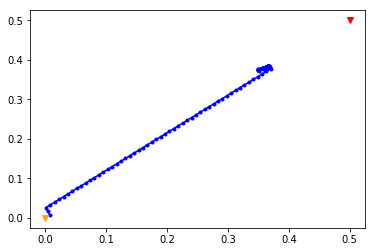

38 tensor(-3.8874)


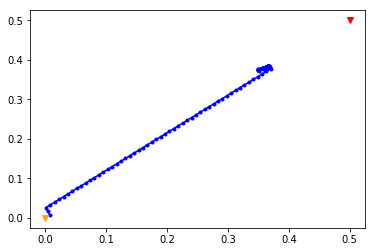

39 tensor(-3.8874)


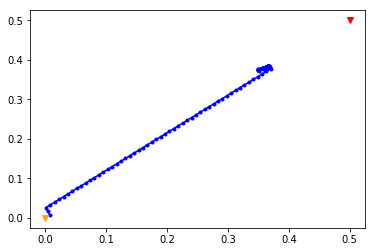

40 tensor(-3.8874)


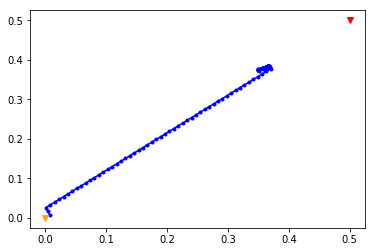

41 tensor(-3.8874)


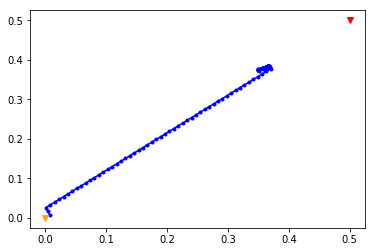

42 tensor(-3.8874)


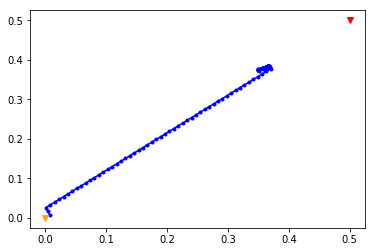

43 tensor(-3.8874)


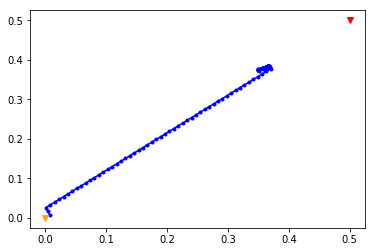

44 tensor(-3.8874)


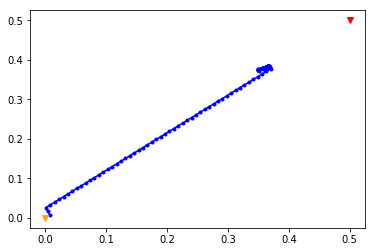

45 tensor(-3.8874)


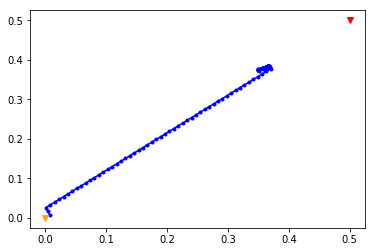

46 tensor(-3.8874)


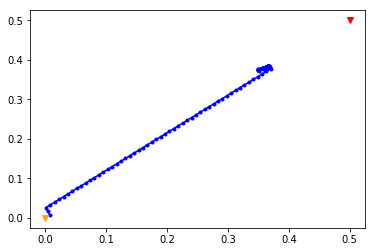

47 tensor(-3.8874)


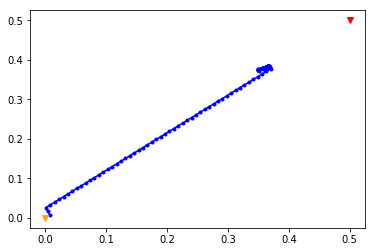

48 tensor(-3.8874)


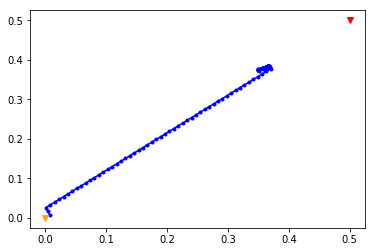

49 tensor(-3.8874)


In [28]:
manager_som_pos = ModifiedManagerSOMPosition(total_nodes=100, state_som = som, worker_som=som, update_iterations=manager_maxitr)

for epoch in range(manager_maxitr):
    # for visualization
    total_return = 0
    state_trajectory = []
    obs = task.state()
    
    for t in range(maxtime):
        obs = task.state()
        
        # epsilon greedy
        if random.random() > epsilon:
            action_index = manager_som_pos.get_action(som.location[som.select_winner(obs)]) # deterministic

        else:
            action_index = random.randrange(som.total_nodes)
        
        # step forward
        reward, next_obs = task.step(som.w[action_index])
        
        # online training
        manager_som_pos.action_q_learning(
            current_state_position = som.location[som.select_winner(obs)],
            action_index = action_index,
            reward = reward,
            t = epoch)
        
        obs = next_obs
        state_trajectory.append(np.array(obs))
        total_return += (0.9 ** t) * reward
        
    plt.plot(np.array(state_trajectory)[:, 0], np.array(state_trajectory)[:, 1], marker='.', linestyle='-', color='blue')
    plt.plot(0.0, 0.0, marker='v', linestyle='None', color='orange')
    plt.plot(np.array(task.goal)[0], np.array(task.goal)[1], marker='v', linestyle='None', color='red')
    plt.show()
    print(epoch, total_return)
    
    task.reset()

In [26]:
# for visualization
total_return = 0
state_trajectory = []

for t in range(maxtime): 
    obs = task.state()
    action_index = manager_som_pos.get_action(som.location[som.select_winner(obs)]) # deterministic

    # step forward
    reward, next_obs = task.step(som.w[action_index])

    obs = next_obs
    state_trajectory.append(np.array(obs))
    total_return += (0.9 ** t) * reward

plt.plot(np.array(state_trajectory)[:, 0], np.array(state_trajectory)[:, 1], marker='.', linestyle='-', color='blue')
plt.plot(0.0, 0.0, marker='v', linestyle='None', color='orange')
plt.plot(np.array(task.goal)[0], np.array(task.goal)[1], marker='v', linestyle='None', color='red')
plt.show()
print(total_return)

task.reset()

RuntimeError: The size of tensor a (100) must match the size of tensor b (2) at non-singleton dimension 1